In [61]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
from skimage.transform import resize

In [62]:
target = []
images = []
flat_data = []

DATADIR = 'C:\\Users\\lenovo\\OneDrive\\Desktop\\Image_Classification\DATA'
CATAGORIES = ['Roses','Cars']

for catagory in CATAGORIES:
    classnum = CATAGORIES.index(catagory)           #labeling encoding values
    path = os.path.join(DATADIR,catagory)           #generating paths to all the images
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        # print(img_array)
        # plt.imshow(img_array)
        image_resized = resize(img_array,(150,150,3))
        flat_data.append(image_resized.flatten())
        images.append(image_resized)
        target.append(classnum)
        # plt.imshow(image_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(flat_data,target,test_size=0.2,random_state=109)
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models,Sequential
from keras.layers import Flatten
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters = 32,activation='relu',kernel_size=(3,3),input_shape=(150,150,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 64,activation='relu',kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [82]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
8/8 [==============================] - 5s 545ms/step - loss: 0.0275 - accuracy: 0.9880
Epoch 2/10
8/8 [==============================] - 4s 521ms/step - loss: 0.0103 - accuracy: 0.9960
Epoch 3/10
8/8 [==============================] - 4s 538ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 4s 483ms/step - loss: 6.8345e-04 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 4s 480ms/step - loss: 2.5539e-04 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 4s 481ms/step - loss: 2.1583e-04 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 4s 482ms/step - loss: 8.1995e-05 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 4s 489ms/step - loss: 6.3363e-05 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 4s 492ms/step - loss: 5.2961e-05 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 4s 491ms/step - loss: 3.9859e-05 - accuracy

(150, 150, 3)
1/1 [==============================] - 0s 28ms/step


'Cars'

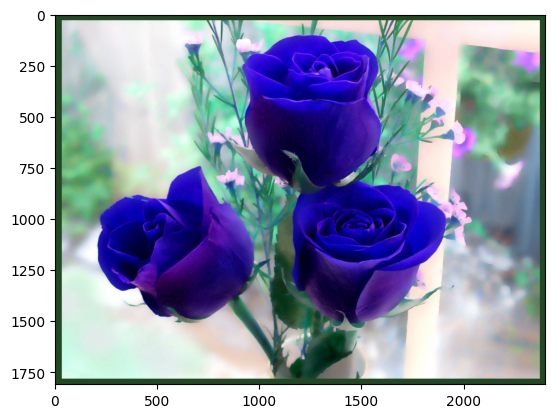

In [86]:
flat = []
url  = input('enter url')
image = cv.imread(url)
imgresize = resize(image,(150,150,3))
flat.append(image_resized.flatten())
flat = np.array(flat)
print(imgresize.shape)
plt.imshow(image)
flat = flat.reshape(-1,150,150,3)
yout = cnn.predict(flat)
yout = CATAGORIES[np.argmax(yout)]
yout

# yout = CATAGORIES[yout[0]]
# print(f'pridicted output:{yout}')